In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Global list to store clicked points
source_points = []

def mouse_callback(event, x, y, flags, param):
    global source_points
    if event == cv2.EVENT_LBUTTONDOWN:
        if len(source_points) < 4:
            source_points.append((x, y))
            cv2.circle(img_copy, (x, y), 3, (0, 0, 255), -1) # Draw a red circle
            cv2.imshow("Original", img_copy)
            print(f"Point {len(source_points)} clicked: ({x}, {y})")



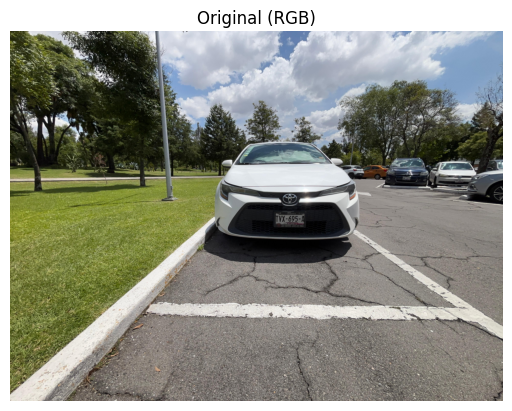

In [21]:
img_bgr = cv2.imread(r"D:\RO\SEPTIMO_SEMESTRE\VISION_ROBOTICA\LRT4012_Vision_en_Robotica-main\imagenes\MINI PROYECYO 1\3.jpg")
if img_bgr is None:
    raise FileNotFoundError("⚠️ No se pudo cargar la imagen. Verifica la ruta.")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
h, w = 4032,3024

plt.imshow(img_rgb); plt.title("Original (RGB)"); plt.axis("off"); plt.show()

img_copy = img_rgb.copy() # Create a copy for drawing circles


In [22]:
# Create a window and set the mouse callback
cv2.namedWindow("Original")
cv2.setMouseCallback("Original", mouse_callback)

print("Click 4 points on the image for perspective transformation.")
print("Press 'q' to quit after selecting points.")

# Display the image and wait for clicks
cv2.imshow("Original", img_copy)
while len(source_points) < 4:
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

if len(source_points) == 4:
    # Convert source points to numpy array with float32 type
    pts1 = np.float32(source_points)

    # Define destination points (e.g., a rectangle for a "straightened" view)
    # Adjust these values based on your desired output dimensions
    pts2 = np.float32([[0, 0], [w, 0], [w, h], [0, h]])

    # Get the perspective transformation matrix
    matrix = cv2.getPerspectiveTransform(pts1, pts2)

    # Apply the perspective transformation
    warped_image = cv2.warpPerspective(img_rgb, matrix, (w, h))

    # Display the original and warped images
    cv2.imshow("Warped Image", warped_image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

Click 4 points on the image for perspective transformation.
Press 'q' to quit after selecting points.
Point 1 clicked: (1201, 295)
Point 2 clicked: (1420, 283)
Point 3 clicked: (1424, 411)
Point 4 clicked: (1232, 439)
